In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import random
from PIL import Image

1.1

(1427, 2100, 3)


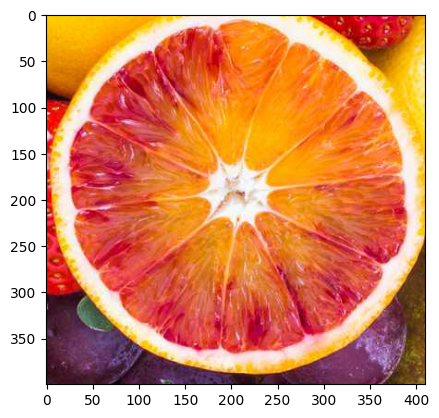

In [2]:
data = iio.imread('fruit.jpg')
bmg = data[800:1200, 570:980]
print(data.shape)

iio.imsave('orange.jpg', bmg)
plt.imshow(bmg)
plt.show()

1.2

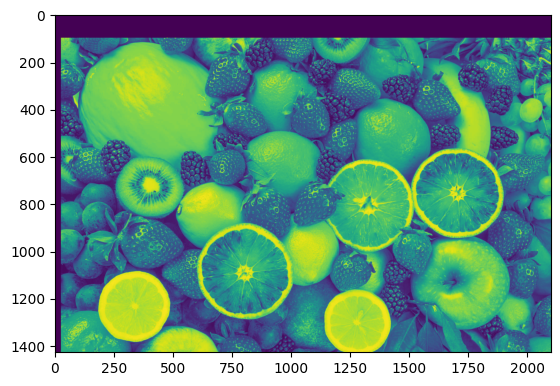

In [3]:
data = iio.imread('fruit.jpg', mode='L')
bdata = nd.shift(data, [100, 25])

plt.imshow(bdata)
plt.show()

1.3

In [4]:
data = iio.imread('fruit.jpg')
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom(data, (2,2,1))
print(data2.shape)
data3 = nd.zoom(data, (0.5,0.9,1))

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


1.4

(1427, 2100)


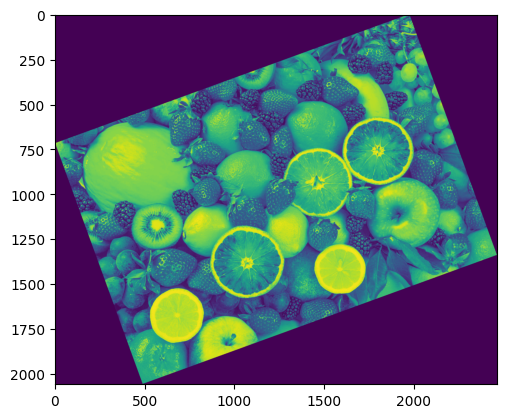

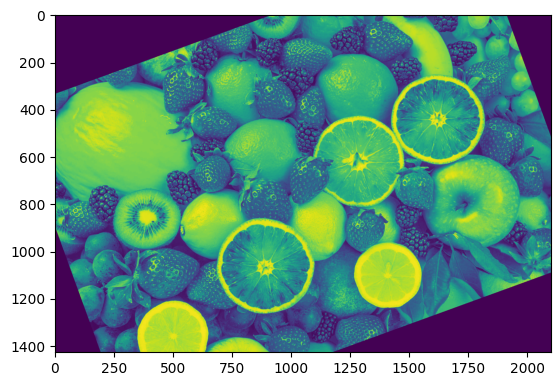

In [5]:
data = iio.imread('fruit.jpg', mode='L')
print(data.shape)

dl = nd.rotate(data, 20)

plt.imshow(dl)
plt.show()

d2 = nd.rotate(data, 20, reshape=False)

plt.imshow(d2)
plt.show()

1.5

(309, 515)


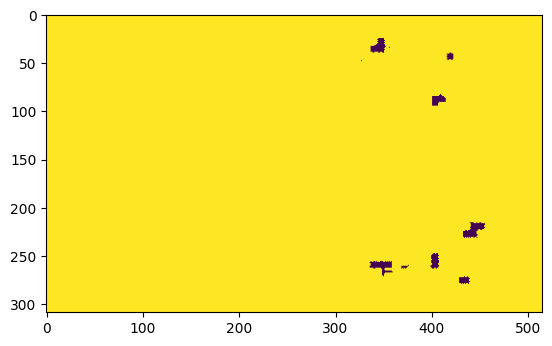

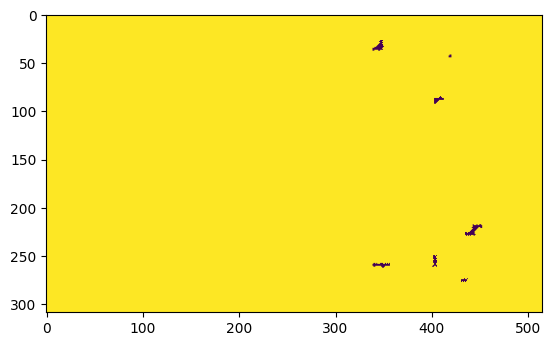

In [6]:
data = iio.imread('world_cup.jpg', mode='L')
print(data.shape)
dl = nd.binary_dilation(data)
plt.imshow(dl)
plt.show()

d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()

1.6

(309, 515)


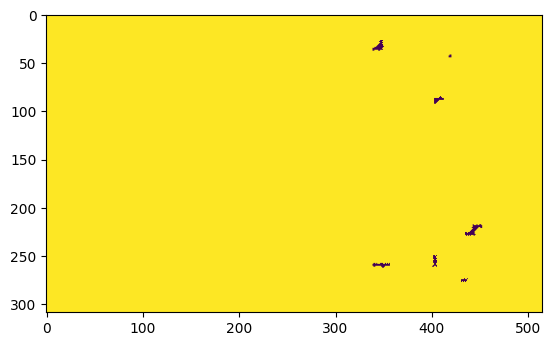

In [7]:
data=iio.imread('world_cup.jpg', mode='L')
print(data.shape)
V,H = data.shape

M = np.indices((V, H))
d = 5
q = 2*d*np.random.ranf(M.shape) - d
mp = (M + q).astype(int)
dl = nd.map_coordinates(data, mp)
plt.imshow(d2)
plt.show()

1.7

(309, 515)


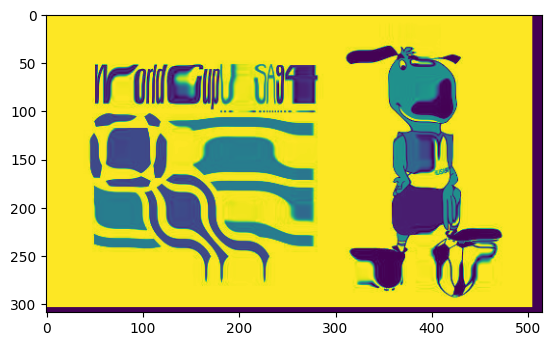

In [8]:
def GeoFun(outcoord):
    a = 10*np.cos(outcoord[0]/10.0)+outcoord[0]
    b = 10*np.cos(outcoord[1]/10.0)+outcoord[1]
    return a,b

data = iio.imread('world_cup.jpg', mode='L')
print(data.shape)
dl = nd.geometric_transform(data, GeoFun)
plt.imshow(dl)
plt.show()
    

Bai tap 1

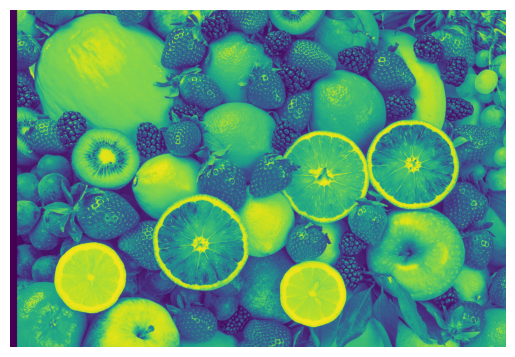

In [9]:
data = iio.imread('fruit.jpg', mode='L')


shifted = nd.shift(data, shift=(0, 30)) 

plt.imshow(shifted)
plt.axis('off')
plt.show()

Bai tap 2

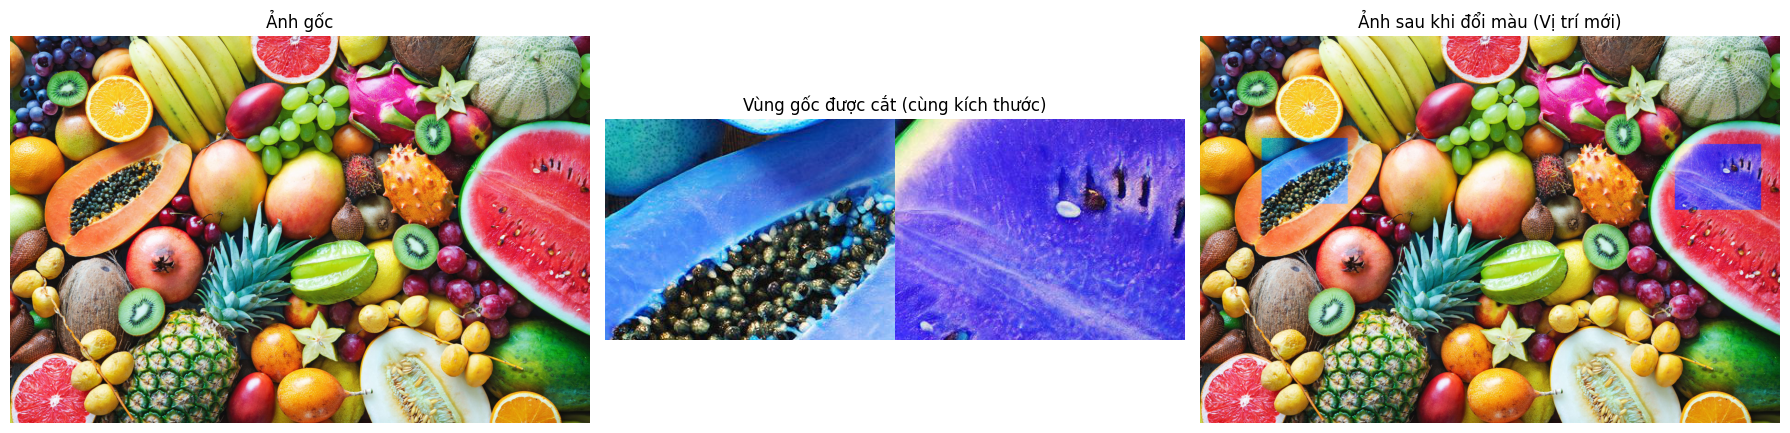

Đã lưu ảnh kết quả vào fruit_color_swapped_new_location.jpg


In [ ]:
import imageio.v2 as iio
import matplotlib.pyplot as plt
import numpy as np

img = iio.imread(r'exercise\colorful-ripe-tropical-fruits.jpg')

# Hiển thị ảnh gốc
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Ảnh gốc')
plt.axis('off')

# Tạo bản sao để xử lý
img_processed = img.copy()

# 1. CẮT CÁC VÙNG ẢNH
# Vùng đu đủ (kích thước chuẩn)
papaya_region = img_processed[375:615, 225:540]   # Kích thước: 240x315 pixels

### THAY ĐỔI: Cập nhật tọa độ dưa hấu theo vị trí mới (giữa ảnh, sát mép phải)
# Tọa độ mới vẫn giữ kích thước 240x315 để khớp với đu đủ
watermelon_region = img_processed[397:637, 1735:2050] # Kích thước 240x315 pixels

# 2. XỬ LÝ CÁC VÙNG ẢNH
# Đổi kênh màu (RGB -> BGR) để thay đổi màu sắc
papaya_new = papaya_region[:, :, ::-1]
watermelon_new = watermelon_region[:, :, ::-1]

# 3. GÁN TRỞ LẠI ẢNH ĐÃ XỬ LÝ
# Gán vùng đu đủ đã đổi màu vào đúng vị trí của nó
img_processed[375:615, 225:540] = papaya_new

### THAY ĐỔI: Gán vùng dưa hấu đã đổi màu vào đúng vị trí MỚI của nó
img_processed[397:637, 1735:2050] = watermelon_new

# 4. HIỂN THỊ KẾT QUẢ
# Hiển thị các vùng gốc đã được cắt ra
plt.subplot(1, 3, 2)
# hstack hoạt động vì hai vùng đã có cùng chiều cao
combined_regions = np.hstack([papaya_region, watermelon_region])
plt.title('Vùng gốc được cắt (cùng kích thước)')
plt.imshow(combined_regions)
plt.axis('off')

# Hiển thị kết quả cuối cùng
plt.subplot(1, 3, 3)
plt.imshow(img_processed)
plt.title('Ảnh sau khi đổi màu (Vị trí mới)')
plt.axis('off')

plt.tight_layout()
plt.show()

# 5. LƯU KẾT QUẢ
iio.imwrite('fruit_color_swapped_new_location.jpg', img_processed)
print("Đã lưu ảnh kết quả vào fruit_color_swapped_new_location.jpg")

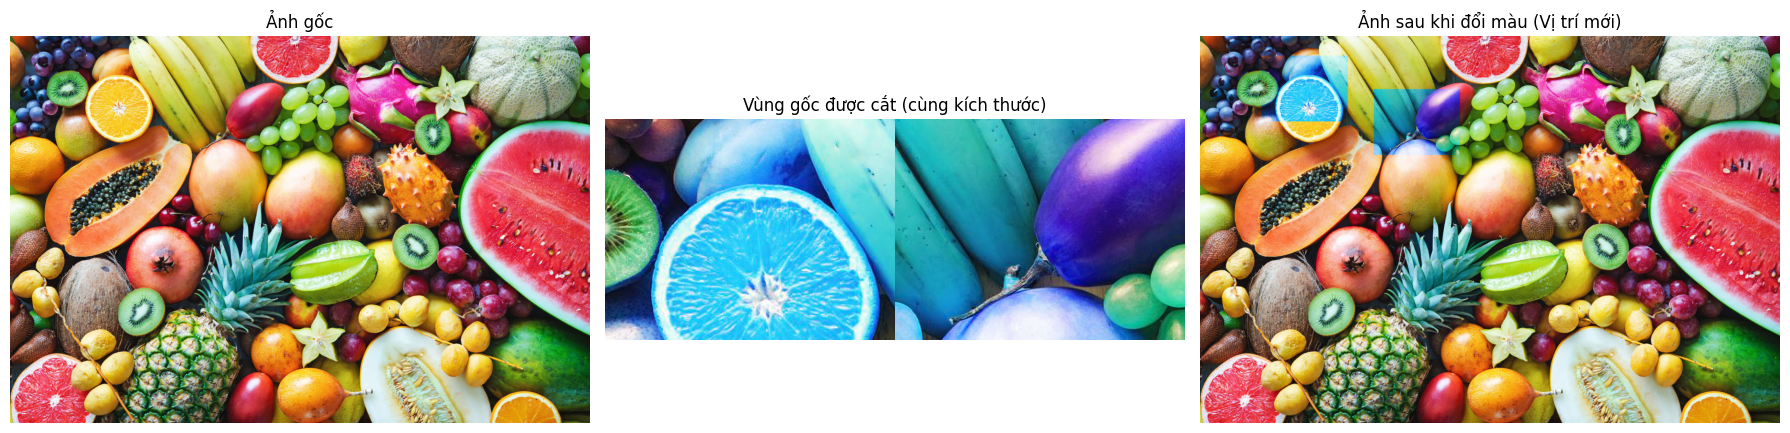

Đã lưu ảnh kết quả vào fruit_color_swapped_new_location.jpg


In [ ]:
import imageio.v2 as iio
import matplotlib.pyplot as plt
import numpy as np

# Đọc ảnh trái cây
# Hãy chắc chắn rằng bạn đã đặt đúng đường dẫn đến tệp ảnh
try:
    img = iio.imread(r'exercise\colorful-ripe-tropical-fruits.jpg')
except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'colorful-ripe-tropical-fruits.jpg'. Vui lòng kiểm tra lại đường dẫn.")
    exit()

# Hiển thị ảnh gốc
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Ảnh gốc')
plt.axis('off')

# Tạo bản sao để xử lý
img_processed = img.copy()

# 1. CẮT CÁC VÙNG ẢNH
# Vùng đu đủ (kích thước chuẩn)
papaya_region = img_processed[75:315, 225:540]   # Kích thước: 240x315 pixels

### THAY ĐỔI: Cập nhật tọa độ dưa hấu theo vị trí mới (giữa ảnh, sát mép phải)
# Tọa độ mới vẫn giữ kích thước 240x315 để khớp với đu đủ
watermelon_region = img_processed[197:437, 635:950] # Kích thước 240x315 pixels

# 2. XỬ LÝ CÁC VÙNG ẢNH
# Đổi kênh màu (RGB -> BGR) để thay đổi màu sắc
papaya_new = papaya_region[:, :, ::-1]
watermelon_new = watermelon_region[:, :, ::-1]

# 3. GÁN TRỞ LẠI ẢNH ĐÃ XỬ LÝ
# Gán vùng đu đủ đã đổi màu vào đúng vị trí của nó
img_processed[75:315, 225:540] = papaya_new

### THAY ĐỔI: Gán vùng dưa hấu đã đổi màu vào đúng vị trí MỚI của nó
img_processed[197:437, 635:950] = watermelon_new

# 4. HIỂN THỊ KẾT QUẢ
# Hiển thị các vùng gốc đã được cắt ra
plt.subplot(1, 3, 2)
# hstack hoạt động vì hai vùng đã có cùng chiều cao
combined_regions = np.hstack([papaya_region, watermelon_region])
plt.title('Vùng gốc được cắt (cùng kích thước)')
plt.imshow(combined_regions)
plt.axis('off')

# Hiển thị kết quả cuối cùng
plt.subplot(1, 3, 3)
plt.imshow(img_processed)
plt.title('Ảnh sau khi đổi màu (Vị trí mới)')
plt.axis('off')

plt.tight_layout()
plt.show()

# 5. LƯU KẾT QUẢ
iio.imwrite('fruit_color_swapped_new_location.jpg', img_processed)
print("Đã lưu ảnh kết quả vào fruit_color_swapped_new_location.jpg")

Bai tap 3

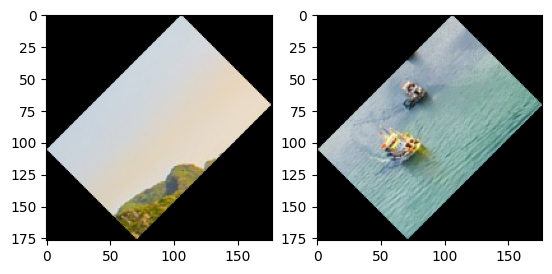

In [11]:
img = iio.imread('exercise/quang_ninh.jpg')

mountain = img[50:150, 100:250]
boat = img[250:350, 200:350]

mountain_rot = nd.rotate(mountain, 45, reshape=True)
boat_rot = nd.rotate(boat, 45, reshape=True)

iio.imwrite('rotated_mountain.jpg', mountain_rot.astype(np.uint8))
iio.imwrite('rotated_boat.jpg', boat_rot.astype(np.uint8))

plt.subplot(1, 2, 1)
plt.imshow(mountain_rot)
plt.subplot(1, 2, 2)
plt.imshow(boat_rot)
plt.show()

Bai tap 4

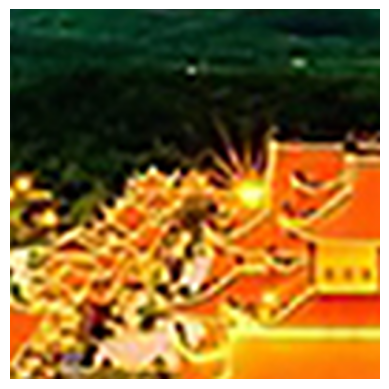

In [12]:
img = iio.imread('exercise/pagoda.jpg')

pagoda = img[100:200, 150:250]

pagoda_zoom = nd.zoom(pagoda, (5, 5, 1))

iio.imwrite('pagoda_zoomed.jpg', pagoda_zoom.astype(np.uint8))

plt.imshow(pagoda_zoom)
plt.axis('off')
plt.show()

Bai tap 5

In [13]:
list_of_images = [r'exercise\colorful-ripe-tropical-fruits.jpg', r'exercise\pagoda.jpg', r'exercise\quang_ninh.jpg', r'exercise\ha-long-bay-in-vietnam.jpg' ]

In [14]:
def tinhtien(list):
    for image in list:
        data = iio.imread(image, mode='L')
        shifted = nd.shift(data, shift=(0, 30))
        plt.imshow(shifted)
        plt.axis('off')
        plt.show()

In [15]:
def xoay(list):
    for image in list:
        data = iio.imread(image, mode='L')
        rotated = nd.rotate(data, 20, reshape=False)
        plt.imshow(rotated)
        plt.axis('off')
        plt.show()

In [16]:
def phongTo(list):
    for image in list:
        data = iio.imread(image, mode='L')
        zoomed_in = nd.zoom(data, 2)
        plt.imshow(zoomed_in)
        plt.axis('off')
        plt.show()

In [17]:
def thuNho(list):
    for image in list:
        data = iio.imread(image, mode='L')
        zoomed_out = nd.zoom(data, 0.1)
        plt.imshow(zoomed_out)
        plt.axis('off')
        plt.show()

In [18]:
def cooridnate_map(list):
    for image in list:
        img = iio.imread(image)
        dx, dy = 100,100

        # Custom (rgb) grid color
        grid_color = [0,0,0]

        # Modify the image to include the grid
        img[:,::dy,:] = grid_color
        img[::dx,:,:] = grid_color

        # Show the result
        plt.imshow(img)
        plt.show()

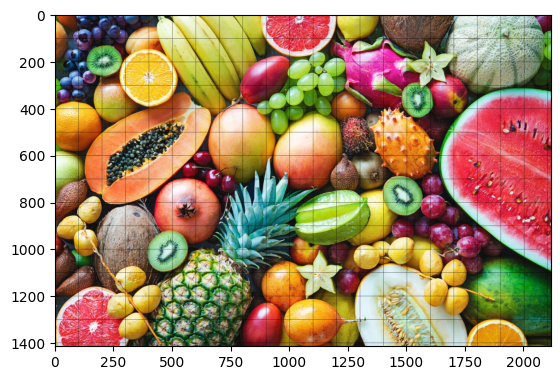

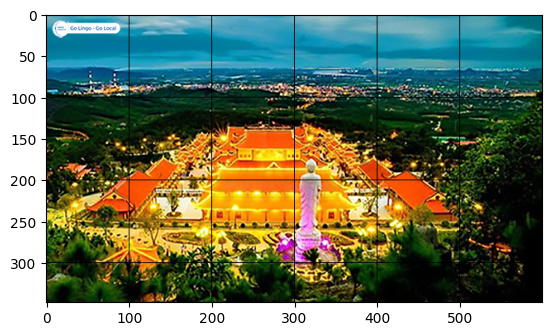

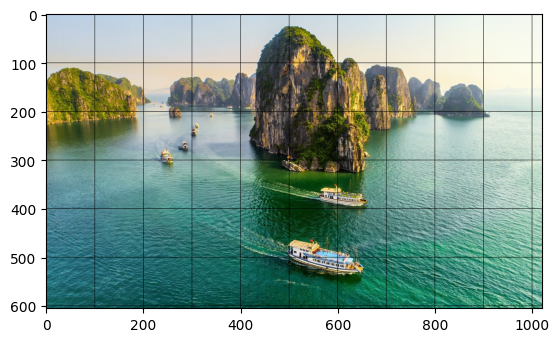

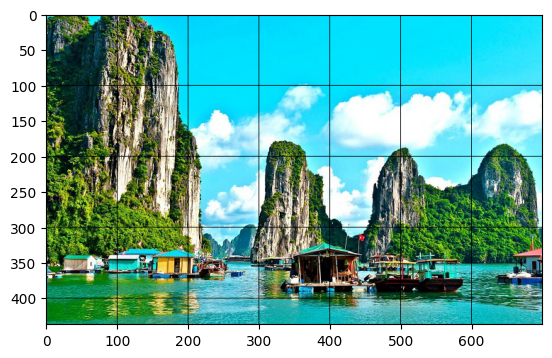

In [19]:
cooridnate_map(list_of_images)

In [20]:
def random_transform():
    list_of_filters =["T", "X", "P", "H", "C"]
    random_choice2 = random.choice(list_of_filters)
    print(random_choice2)
    if random_choice2 == "T":
        print("Tịnh tiến")
        tinhtien(list_of_images)
    elif random_choice2 == "X":
        print("Xoay")
        xoay(list_of_images)
    elif random_choice2 == "P":
        print("Phóng to")
        phongTo(list_of_images)
    elif random_choice2 == "H":
        print("Thu nhỏ")
        thuNho(list_of_images)
    else:
        print("Cooridnate map")
        cooridnate_map(list_of_images)

C
Cooridnate map


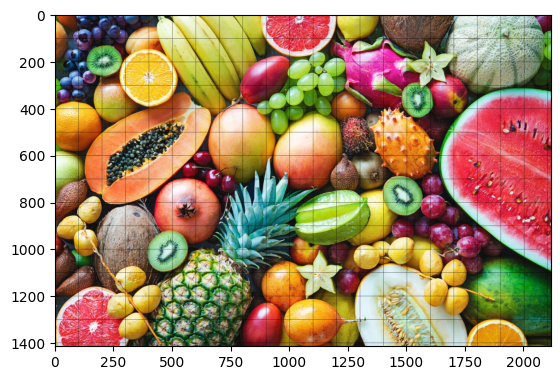

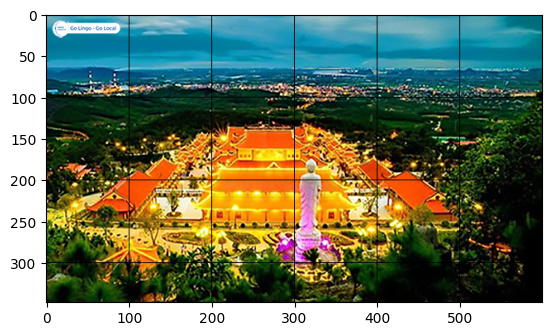

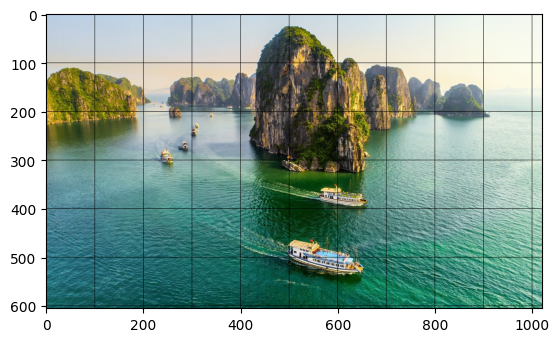

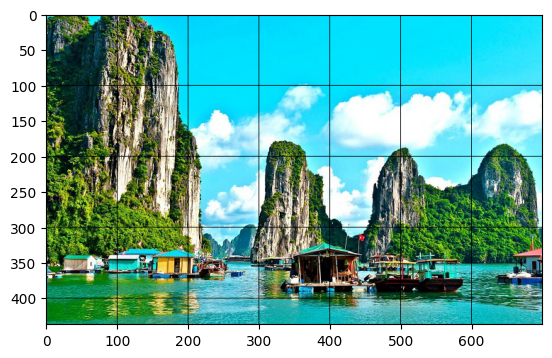

In [21]:
random_transform()

Bai tap them 1

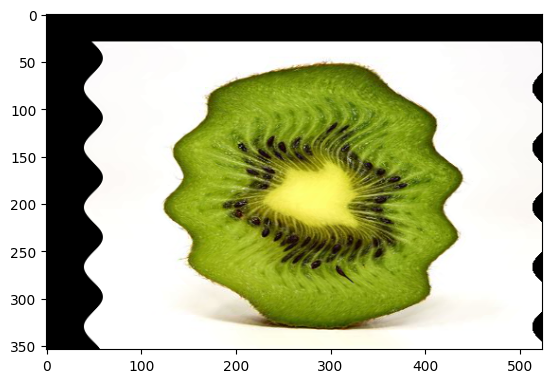

Đã lưu ảnh kết quả vào kiwi_wave.jpg


In [22]:

# Đọc ảnh kiwi
img = Image.open('kiwi.jpg')
img_array = np.array(img)
h, w = img_array.shape[:2]

# Tạo canvas mới với kích thước lớn hơn để chứa ảnh đã tịnh tiến
new_h, new_w = h + 30, w + 50
canvas = np.zeros((new_h, new_w, 3), dtype=np.uint8)

# Tịnh tiến 50px sang phải, 30px xuống
canvas[30:30+h, 50:50+w] = img_array

# Tạo hiệu ứng sóng
def wave_transform(coords):
    x, y = coords
    # Áp dụng hiệu ứng sóng theo trục x
    x_wave = x + 10 * np.sin(y * 0.1)
    return np.array([x_wave, y])

# Tạo lưới tọa độ
y_coords, x_coords = np.mgrid[0:new_h, 0:new_w]
coords = np.array([x_coords.flatten(), y_coords.flatten()])

# Áp dụng biến đổi sóng
transformed_coords = wave_transform(coords)

# Áp dụng map_coordinates cho từng channel màu
result = np.zeros((new_h, new_w, 3), dtype=np.uint8)
for i in range(3):
    result[:,:,i] = nd.map_coordinates(canvas[:,:,i],
                                   [transformed_coords[1].reshape(new_h, new_w),
                                    transformed_coords[0].reshape(new_h, new_w)],
                                   order=1, mode='constant', cval=0)

# Lưu ảnh kết quả
Image.fromarray(result).save('kiwi_wave.jpg')
plt.imshow(result)
plt.show()

print("Đã lưu ảnh kết quả vào kiwi_wave.jpg")

Bài 2


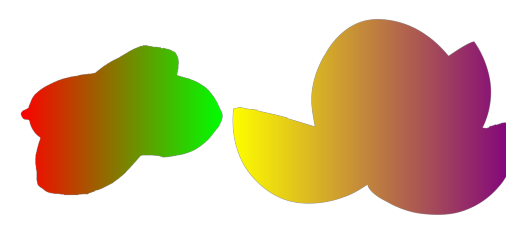

Đã lưu ảnh kết quả vào fruit_gradient.png


In [23]:

# Đọc ảnh đu đủ và dưa hấu
papaya = Image.open('papaya.png').convert('RGBA')
watermelon = Image.open('watermelon.png').convert('RGBA')

def apply_gradient(img, color1, color2):
    """Áp dụng gradient từ color1 sang color2"""
    img_array = np.array(img)
    h, w = img_array.shape[:2]
    
    # Tạo gradient theo chiều ngang
    gradient = np.linspace(0, 1, w)
    
    # Tính toán màu gradient cho mỗi pixel
    result = img_array.copy()
    for y in range(h):
        for x in range(w):
            if img_array[y, x, 3] > 0:  # Chỉ áp dụng cho pixel không trong suốt
                t = gradient[x]
                # Interpolation giữa hai màu
                result[y, x, 0] = int(color1[0] * (1-t) + color2[0] * t)  # R
                result[y, x, 1] = int(color1[1] * (1-t) + color2[1] * t)  # G
                result[y, x, 2] = int(color1[2] * (1-t) + color2[2] * t)  # B
    
    return Image.fromarray(result)

# Áp dụng gradient
papaya_gradient = apply_gradient(papaya, (255, 0, 0), (0, 255, 0))  # Đỏ -> Xanh lá
watermelon_gradient = apply_gradient(watermelon, (255, 255, 0), (128, 0, 128))  # Vàng -> Tím

# Tạo canvas với nền trong suốt
canvas_w = max(papaya.width + watermelon.width + 50, 800)
canvas_h = max(papaya.height, watermelon.height) + 100
canvas = Image.new('RGBA', (canvas_w, canvas_h), (0, 0, 0, 0))

# Ghép hai quả lên canvas
canvas.paste(papaya_gradient, (50, 50), papaya_gradient)
canvas.paste(watermelon_gradient, (papaya.width + 100, 50), watermelon_gradient)

canvas.save('fruit_gradient.png')

plt.imshow(canvas)
plt.axis('off')
plt.show()
print("Đã lưu ảnh kết quả vào fruit_gradient.png")

Bài 3

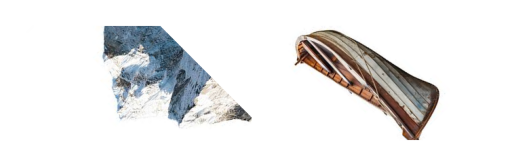

Đã lưu ảnh kết quả vào mountain_boat_mirror.jpg


In [24]:
# Đọc ảnh núi và thuyền
mountain = Image.open('mountain.jpg')
boat = Image.open('boat.jpg')

# Chuyển sang array
mountain_array = np.array(mountain)
boat_array = np.array(boat)

# Xoay 45 độ, giữ kích thước ban đầu (reshape=False)
mountain_rotated = nd.rotate(mountain_array, 45, reshape=False, mode='constant', cval=255)
boat_rotated = nd.rotate(boat_array, 45, reshape=False, mode='constant', cval=255)

# Tạo hiệu ứng phản chiếu dọc (vertical mirror)
mountain_mirrored = np.flipud(mountain_rotated)
boat_mirrored = np.flipud(boat_rotated)

# Tạo canvas trắng
canvas_w = mountain.width + boat.width + 100
canvas_h = max(mountain.height, boat.height) + 50
canvas = np.full((canvas_h, canvas_w, 3), 255, dtype=np.uint8)

# Ghép núi lên canvas
canvas[25:25+mountain.height, 25:25+mountain.width] = mountain_mirrored

# Ghép thuyền lên canvas
boat_x = mountain.width + 50
canvas[25:25+boat.height, boat_x:boat_x+boat.width] = boat_mirrored

# Lưu kết quả
canvas_img = Image.fromarray(canvas)
canvas_img.save('mountain_boat_mirror.jpg')

# Hiển thị ảnh
plt.axis('off')
plt.imshow(canvas)  # Dùng array gốc
plt.show()

print("Đã lưu ảnh kết quả vào mountain_boat_mirror.jpg")

Bài 4


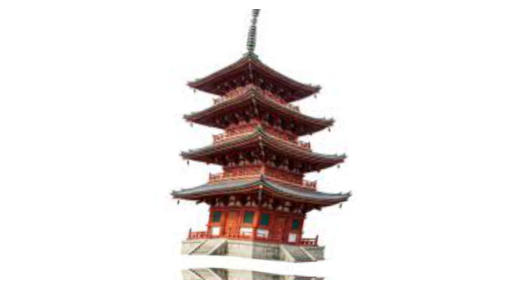

In [25]:
# Đọc ảnh ngôi chùa
pagoda = Image.open('pagoda.jpg')
pagoda_array = np.array(pagoda)

# Phóng to 5 lần
pagoda_zoomed = nd.zoom(pagoda_array, (5, 5, 1), order=1)
h, w = pagoda_zoomed.shape[:2]

# Tạo biến đổi hình học tùy chỉnh - hiệu ứng uốn cong
def warp_transform(coords):
    x, y = coords
    # Tạo hiệu ứng uốn cong bằng cách kết hợp sin và cos
    center_x, center_y = w/2, h/2
    
    # Tính khoảng cách từ tâm
    dx = x - center_x
    dy = y - center_y
    r = np.sqrt(dx**2 + dy**2)
    
    # Áp dụng hiệu ứng uốn cong
    warp_factor = 0.0003
    x_warped = x + 20 * np.sin(y * 0.01) + warp_factor * dx * r
    y_warped = y + 15 * np.cos(x * 0.01) + warp_factor * dy * r
    
    return np.array([y_warped, x_warped])  # y, x cho map_coordinates

# Tạo lưới tọa độ
y_coords, x_coords = np.mgrid[0:h, 0:w]
coords = np.array([x_coords.flatten(), y_coords.flatten()])

# Áp dụng biến đổi uốn cong
transformed_coords = warp_transform(coords)

# Áp dụng map_coordinates cho từng channel màu
result = np.zeros((h, w, 3), dtype=np.uint8)
for i in range(3):
    result[:,:,i] = nd.map_coordinates(pagoda_zoomed[:,:,i], 
                                   transformed_coords.reshape(2, h, w),
                                   order=1, mode='reflect')

# Lưu ảnh kết quả
Image.fromarray(result).save('pagoda_warped.jpg')
plt.imshow(result)
plt.axis('off') 
plt.show()

Bài 5

In [26]:
from scipy.ndimage import gaussian_filter

In [27]:
def tinhtien2(image):
    data = iio.imread(image, mode='L')
    x = int(input("Nhap gia tri tinh tien x: "))
    y = int(input("Nhap gia tri tinh tien y: "))
    shifted = nd.shift(data, shift=(x, y))
    plt.imshow(shifted)
    plt.axis('off')
    plt.show()

In [28]:
def xoay2(image):
    data = iio.imread(image, mode='L')
    angle = int(input("Nhap goc xoay: "))
    reshape = input("Nhap reshape (True/False): ").strip().lower()
    if reshape:
        rotated = nd.rotate(data, angle, reshape=True)
    else:   
        rotated = nd.rotate(data, angle, reshape=False)
    plt.imshow(rotated)
    plt.axis('off')
    plt.show()

In [29]:
def zoom2(image):
    data = iio.imread(image, mode='L')
    zoom_factor = float(input("Nhap he so zoom: "))
    zoomed = nd.zoom(data, zoom_factor)
    plt.imshow(zoomed)
    plt.axis('off')
    plt.show()

In [30]:
def gaussian_blur(image):
    data = iio.imread(image, mode='L')
    sigma = float(input("Nhap he so sigma cho bo loc Gaussian: "))
    blurred = gaussian_filter(data, sigma=sigma)
    plt.imshow(blurred)
    plt.axis('off')
    plt.show()

In [31]:
def wave_transform(coords):
    x, y = coords
    amplitude = float(input("Nhập biên độ sóng: "))
    # Tạo hiệu ứng sóng bằng hàm sin
    x_wave = x + amplitude  * np.sin(y * 0.1)
    plt.imshow(x_wave)
    plt.axis('off')
    plt.show()

In [32]:
def menu():
    print("Chọn thao tác:")
    print("1. Tịnh tiến")
    print("2. Xoay")
    print("3. Phóng to")
    print("4. Làm mờ Gaussian")
    print("5. Hiệu ứng sóng")
    choice = input("Nhập lựa chọn của bạn (1-5): ")
    
    print("Danh sách ảnh:")
    list_of_images = ['kiwi.jpg', 'fruit.jpg', 'pagoda.jpg']
    for image in list_of_images:
        print(image)
    image = input("Nhập đường dẫn đến ảnh (1-3): ")
    
    
    if choice == '1':
        tinhtien2(list_of_images[int(image)-1])
    elif choice == '2':
        xoay2(list_of_images[int(image)-1])
    elif choice == '3':
        zoom2(list_of_images[int(image)-1])
    elif choice == '4':
        gaussian_blur(list_of_images[int(image)-1])
    elif choice == '5':
        wave_transform(list_of_images[int(image)-1])
    else:
        print("Lựa chọn không hợp lệ.")

In [33]:
menu()

Chọn thao tác:
1. Tịnh tiến
2. Xoay
3. Phóng to
4. Làm mờ Gaussian
5. Hiệu ứng sóng
Danh sách ảnh:
kiwi.jpg
fruit.jpg
pagoda.jpg
Lựa chọn không hợp lệ.
